In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats
import  statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import  statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.arima_model import  ARMA
from statsmodels.tsa.arima_model import  ARIMA
from statsmodels.tsa.statespace.sarimax import  SARIMAX
from pmdarima.arima import  auto_arima
from typing import Union
from tqdm import tqdm_notebook
from itertools import product
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Load data and print examples
drive.mount('/content/drive')
Ruta_Archivo = '/content/drive/MyDrive/Ventas_Hora_V2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Datos=pd.read_csv(Ruta_Archivo,header=0, sep=";", decimal=".")
Datos.head()

,Fecha,Q_Ventas
0,1-6,10
1,1-7,29
2,1-8,68
3,1-9,60
4,1-10,58


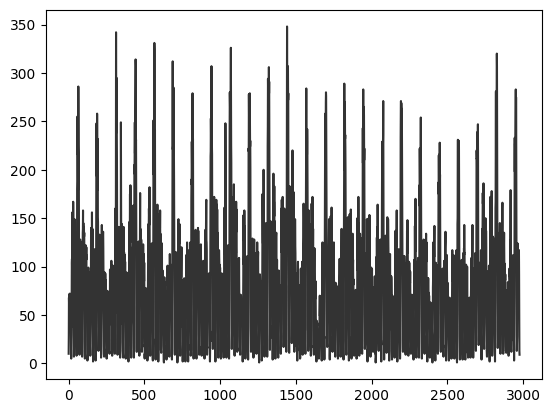

In [ ]:
plt.plot(Datos.iloc[:,1:],alpha=0.8, color="black")

In [ ]:
print(Datos.describe())

          Q_Ventas
count  2978.000000
mean     88.694090
std      62.929562
min       1.000000
25%      42.000000
50%      82.000000
75%     117.000000
max     348.000000


In [ ]:
Datos.head()

,Fecha,Q_Ventas
0,1-6,10
1,1-7,29
2,1-8,68
3,1-9,60
4,1-10,58


In [ ]:
#Datos.iloc[:, 0] = pd.to_datetime(Datos.iloc[:, 0])
#print(Datos.dtypes)

In [ ]:
NamesCol=Datos.columns.values
print(NamesCol)

['Fecha' 'Q_Ventas']


In [ ]:
NamesCol[0]


'Fecha'

In [ ]:
Datos.set_index(NamesCol[0],inplace=True)

In [ ]:
Datos.head()

,Q_Ventas
Fecha,
1-6,10
1-7,29
1-8,68
1-9,60
1-10,58


In [ ]:
# Estacionaridad

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Datos['Q_Ventas'])


(0.01, False)

In [ ]:

#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(Datos['Q_Ventas'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")


pvalue =  1.2337885724622832e-09  if above 0.05, data is not stationary


La estacionariedad es una condición sine qua non para usar ARIMA, dado que conserva las propiedades estadísticas de varianza, media, etc. Dado que la mayoría de las series no son estacionarias se debe diferenciar para lograr la estacionaridad.

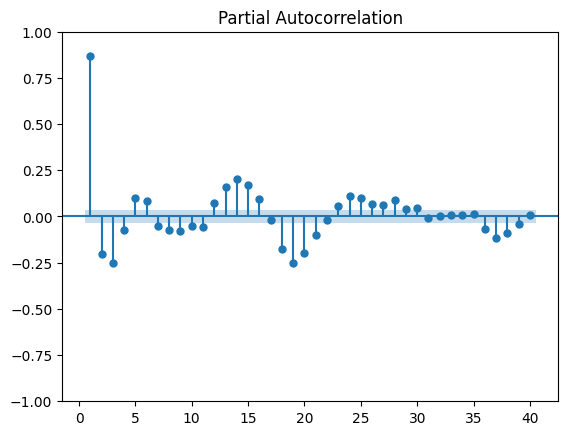

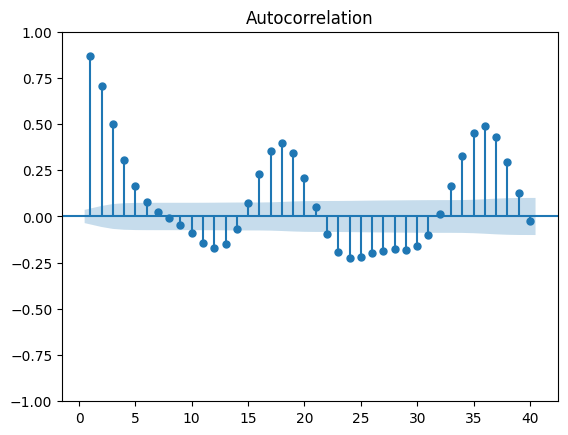

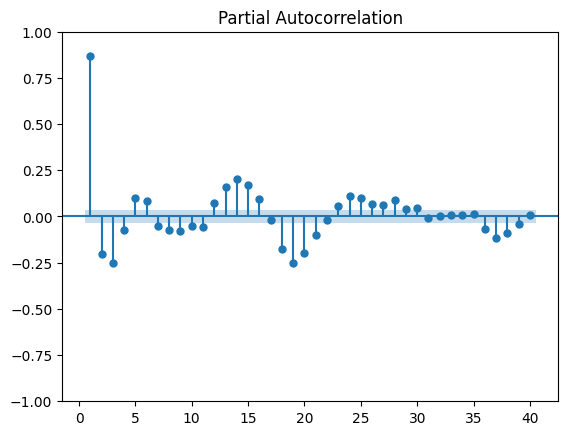

In [ ]:
sgt.plot_acf(Datos['Q_Ventas'], lags=40,zero=False)
sgt.plot_pacf(Datos['Q_Ventas'], lags=40, zero=False, method=("ols"))

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(Datos['Q_Ventas'], start_p = 1, d=1, start_q = 1,
                          max_p = 3, max_q = 3, max_d=1, m =18,
                          start_P = 0, D=0, start_Q=0, max_P=3, max_D=1, max_Q=3,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[18] intercept   : AIC=29075.455, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[18] intercept   : AIC=29133.616, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[18] intercept   : AIC=28630.794, Time=5.03 sec
 ARIMA(0,1,1)(0,0,1)[18] intercept   : AIC=28842.204, Time=3.97 sec
 ARIMA(0,1,0)(0,0,0)[18]             : AIC=29131.616, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[18] intercept   : AIC=29091.098, Time=0.14 sec
 ARIMA(1,1,0)(2,0,0)[18] intercept   : AIC=28300.279, Time=18.69 sec
 ARIMA(1,1,0)(3,0,0)[18] intercept   : AIC=inf, Time=38.38 sec
 ARIMA(1,1,0)(2,0,1)[18] intercept   : AIC=27948.040, Time=31.00 sec
 ARIMA(1,1,0)(1,0,1)[18] intercept   : AIC=27946.188, Time=4.06 sec
 ARIMA(1,1,0)(0,0,1)[18] intercept   : AIC=28842.203, Time=3.41 sec
 ARIMA(1,1,0)(1,0,2)[18] intercept   : AIC=27948.050, Time=34.47 sec
 ARIMA(1,1,0)(0,0,2)[18] intercept   : AIC=28617.194, Time=16.23 sec
 ARIMA(1,1,0)(2,0,2)[18] intercept   : AIC=27948.651, Time=53.28 sec
 ARIM

In [ ]:
# To print the summary
print(arima_model.summary() ) #Note down the Model and details.

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2978
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 18)   Log Likelihood              -13968.094
Date:                              Mon, 24 Jun 2024   AIC                          27944.187
Time:                                      16:58:51   BIC                          27968.182
Sample:                                           0   HQIC                         27952.821
                                             - 2978                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2297      0.014    -16.298      0.000      -0.257      -0.202
ar.S.L18       0.98

In [ ]:
PruebaEstacionariedad=sts.adfuller(Datos['Q_Ventas'])
print(PruebaEstacionariedad)

Pvalor=PruebaEstacionariedad[1]
print(Pvalor)
# el pvalor es el segundo elemento de la prueba df

MedidaPvalor=0.05

print(Pvalor<MedidaPvalor)

# si el resultado es false se acepta la hipotesis nula y se entiende que los datos no
# son estacionarios
# igualmente se debe revisar el pvalor porque su tamaño es muy grande y ya se entiende
# que no es estacionaria. ademas se ve en el grafico de la serie.

# Descompose de la serie. Usare el metodo aditivo por default.


(-6.907883099026201, 1.2337885724622832e-09, 29, 2948, {'1%': -3.4325701503289845, '5%': -2.8625209161584713, '10%': -2.5672921685377847}, 27368.05419596359)
1.2337885724622832e-09
True


In [ ]:

#DescAditiva= seasonal_decompose(Datos['Q_Ventas'], model="additive")

#DescAditiva.plot()

In [ ]:
#seasonal = DescAditiva.seasonal

In [ ]:
#plt.figure(figsize=(10,5))
#plt.plot(seasonal)

In [ ]:
ValorTraining=int(len(Datos)*0.9)
print(ValorTraining)

# se usara 90 porciento para training

ValorTest=len(Datos)-ValorTraining
print(ValorTest)

DatosTraining=Datos.iloc[:ValorTraining]

#Test desde el corte en valor hasta el final

DatosTest=Datos.iloc[ValorTraining:]

print(DatosTraining.tail())

print(DatosTest.head())

2680
298
      Fecha  Q_Ventas
2675   27-9        98
2676  27-10        78
2677  27-11        87
2678  27-12        81
2679  27-13        59
      Fecha  Q_Ventas
2680  27-14        81
2681  27-15        46
2682  27-16        77
2683  27-17        79
2684  27-18       114


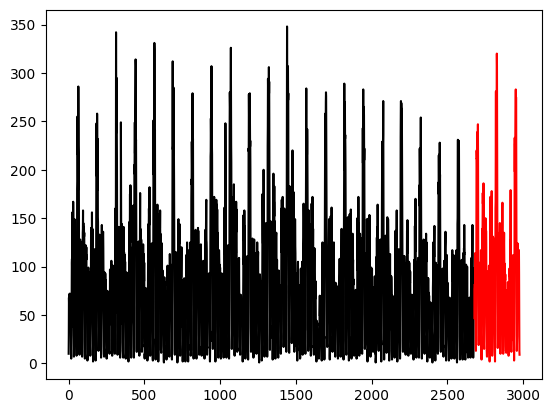

In [ ]:
plt.plot(DatosTraining.iloc[:,1], color="black")
plt.plot(DatosTest.iloc[:,1], color="red")

In [ ]:
len(DatosTraining), len(DatosTest)

(2680, 298)

In [ ]:


model = SARIMAX(DatosTraining.iloc[:,1],
                order = (1,1,0),
                seasonal_order =(1, 0, 1, 18))

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Q_Ventas   No. Observations:                 2680
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 18)   Log Likelihood              -12560.047
Date:                              Mon, 24 Jun 2024   AIC                          25128.095
Time:                                      17:30:38   BIC                          25151.668
Sample:                                           0   HQIC                         25136.623
                                             - 2680                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2370      0.015    -16.065      0.000      -0.266      -0.208
ar.S.L18       0.9797      0.004    227.214      0.000       0.971       0.988
ma.S.L18      -0.8206      0.014    -60.143      0.000      -0.847      -0.794
sigma2       686.4687     11.130     61.677      0.000     664.654     708.283
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2086.19
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
NamesCol

array(['Fecha', 'Q_Ventas'], dtype=object)

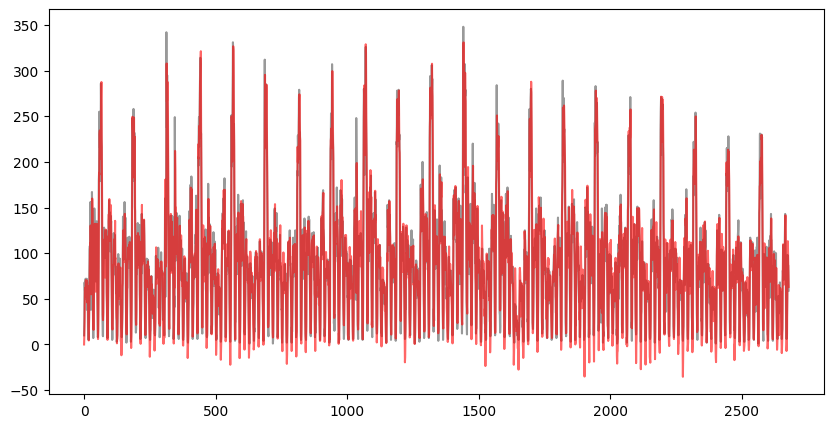

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(DatosTraining.iloc[:,1], color="black", alpha=0.4)
plt.plot(result.predict(), color="red", alpha=0.6)


<Axes: >

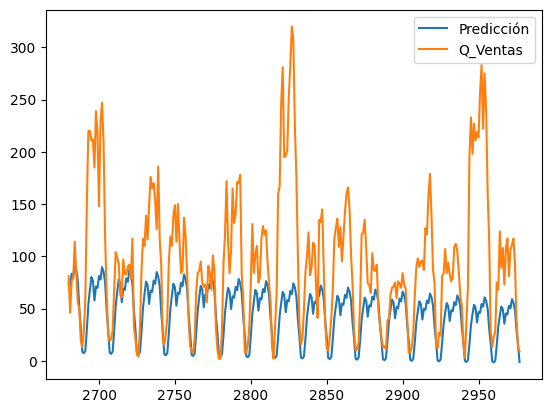

In [ ]:
#Train prediction
start_index = 0
end_index = len(DatosTraining['Q_Ventas'])-1
train_prediction = result.predict(start_index, end_index)

#Prediction
start_index = len(DatosTraining['Q_Ventas'])
end_index = len(Datos)-1
prediction = result.predict(start_index, end_index).rename('Predicción')
#Rename the column

# plot predictions and actual values
prediction.plot(legend = True)
DatosTest[NamesCol[1]].plot(legend = True)

In [119]:
def calculate_mse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    return mse

In [122]:
Prediccion=result.predict().values

In [123]:
Prediccion

array([  0.        ,   9.99719601,  24.49745865, ..., 100.67668302,
        84.67649523,  63.06747441])

In [130]:
len(result.predict(start_index, end_index))

298

In [131]:
len(DatosTest['Q_Ventas'].values)

298

In [129]:
MSE = calculate_mse(result.predict(start_index, end_index), DatosTest['Q_Ventas'].values)
print(f'MSE: {MSE:.2f}')

MSE: 5468.93


In [132]:
# Suponiendo train_predictions y y_train son numpy arrays
def calculate_rmse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# Ejemplo de uso
RSME = calculate_rmse(result.predict(start_index, end_index), DatosTest['Q_Ventas'].values)
print(f'RMSE: {RSME:.2f}')

RMSE: 73.95


In [133]:
np.sqrt(MSE)

73.95218640981788

Lo que sigue son pruebas...

In [ ]:
# Tomado de Time series forecasting in python

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 5, 1) # Esto es iniciando en 0 , hasta 5, de a 1.
qs = range(0, 5, 1)
d = 1

In [ ]:
order_list = list(product(ps,qs))

In [ ]:
result_df = optimize_ARIMA(Datos['Q_Ventas'], order_list, d)
result_df

<ipython-input-94-d7ec99ffe8a9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

,"(p,q)",AIC
0,"(4, 4)",28364.811195
1,"(3, 3)",28365.631054
2,"(4, 3)",28513.137465
3,"(2, 3)",28542.485091
4,"(2, 4)",28557.796528
5,"(3, 4)",28572.840745
6,"(1, 4)",28576.901299
7,"(4, 2)",28607.540804
8,"(4, 1)",28613.956026
9,"(3, 2)",28621.583364


In [ ]:
model = SARIMAX(DatosTraining.iloc[:,1],
                order = (4,0,4),
                seasonal_order =(0, 0, 0, 0))

In [ ]:
result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Q_Ventas   No. Observations:                 2680
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -12835.535
Date:                Mon, 24 Jun 2024   AIC                          25689.069
Time:                        17:29:18   BIC                          25742.111
Sample:                             0   HQIC                         25708.258
                               - 2680                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5707      0.298      8.637      0.000       1.987       3.154
ar.L2         -2.5027      0.700     -3.576      0.000      -3.874      -1.131
ar.L3          1.1345      0.564      2.013      0.044       0.030       2.239
ar.L4         -0.2025      0.161     -1.255      0.209      -0.519       0.114
ma.L1         -1.6095      0.297     -5.416      0.000      -2.192      -1.027
ma.L2          1.1003      0.418      2.629      0.009       0.280       1.920
ma.L3         -0.5021      0.224     -2.240      0.025      -0.941      -0.063
ma.L4          0.0150      0.102      0.148      0.882      -0.184       0.214
sigma2       850.2377     15.910     53.439      0.000     819.054     881.422
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              1138.43
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

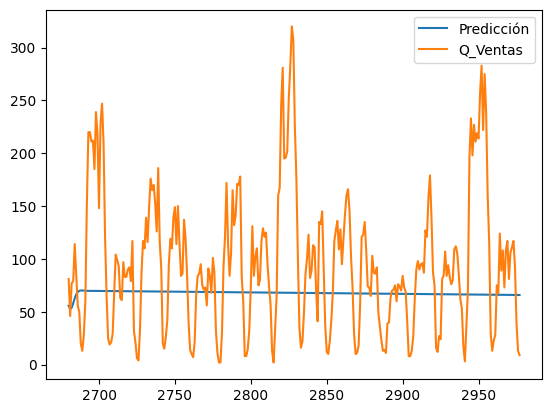

In [ ]:
#Train prediction
start_index = 0
end_index = len(DatosTraining['Q_Ventas'])-1
train_prediction = result.predict(start_index, end_index)

#Prediction
start_index = len(DatosTraining['Q_Ventas'])
end_index = len(Datos)-1
prediction = result.predict(start_index, end_index).rename('Predicción')
#Rename the column

# plot predictions and actual values
prediction.plot(legend = True)
DatosTest[NamesCol[1]].plot(legend = True)

In [ ]:
pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.6/560.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import shap

In [ ]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )
forecaster.fit(y=DatosTraining['Q_Ventas'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 2679] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-06-24 17:32:11 
Last fit date: 2024-06-24 17:32:13 
Skforecast version: 0.12.1 
Python version: 3.10.12 
Forecaster id: None 

In [ ]:
steps = len(DatosTest)
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

2680    60.37
2681    52.24
2682    47.73
2683    46.04
2684    38.65
Name: pred, dtype: float64

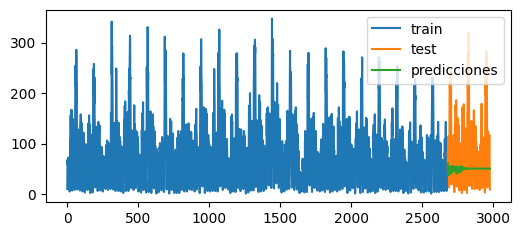

In [ ]:
# Gráfico de predicciones vs valores reales
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2.5))
DatosTraining['Q_Ventas'].plot(ax=ax, label='train')
DatosTest['Q_Ventas'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();